#### CS166 Pre-Class Work for Session 8.2:

### Network Metrics: PageRank

_Yoav Rabinovich, March 2019_

--------------

_Construct a random surfer simulation that gives the same results as the PageRank
algorithm._

_Visualize the PageRank results by varying node color in your network._

_Draw a plot showing how the error in your simulation results decreases as the random
surfer simulation is run for more steps._

In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

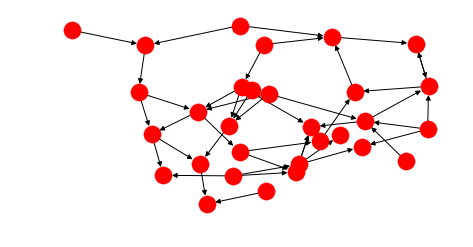

In [156]:
network_size = 30
edge_probability = 0.05
seed = 123

g = nx.erdos_renyi_graph(network_size, edge_probability, directed=True, seed=seed)
pagerank = nx.pagerank(g)
pr_weights = [pagerank[i] for i in g.nodes()]

plt.figure(figsize=(6,3))
nx.draw(g, pos=nx.kamada_kawai_layout(g))
plt.show()

In [0]:
def RandomWalk(graph,steps,p):
    
    visits = np.zeros(len(graph.nodes()))
    current_node=np.random.choice(range(graph.number_of_nodes()))

    for i in range(int(steps)):
        visits[current_node] += 1/steps
        next_nodes = [s for s in graph.successors(current_node)]
        if np.random.rand()<p and len(next_nodes)!=0:
            current_node = np.random.choice(next_nodes)
        else:
            current_node = np.random.choice(range(graph.number_of_nodes()))
            
    return visits

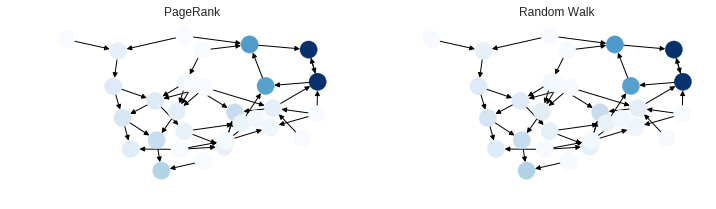

In [170]:
weights = RandomWalk(g,100000,0.85)

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title("PageRank")
nx.draw(g, pos=nx.kamada_kawai_layout(g),node_color=pr_weights,cmap=plt.cm.Blues)
plt.subplot(1,2,2)
plt.title("Random Walk")
nx.draw(g, pos=nx.kamada_kawai_layout(g),node_color=weights,cmap=plt.cm.Blues)
plt.show()

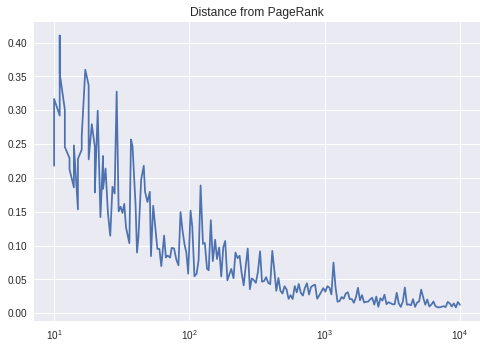

In [168]:
alpha=0.85
distances = []
steps_range = np.logspace(1,4,200)
steps_range= np.floor(steps_range)

for n in steps_range:
    visits = RandomWalk(g,n,alpha)
    distances.append(abs(np.linalg.norm(visits-pr_weights)))

plt.title("Distance from PageRank")
plt.semilogx(steps_range,distances)
plt.show()